In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [2]:
total = 50

In [3]:
points = []

for red in range(1, 50):
    blue = total - red
    
    entropy = - red/total * np.log(red/total) - blue/total * np.log(blue/total) 
    
    points.append(entropy)

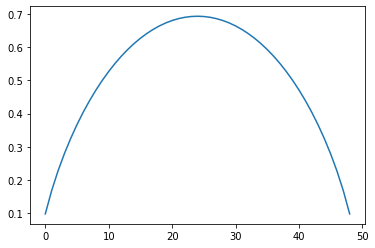

In [4]:
plt.plot(points)

In [5]:
def entropy(nums):
    _, counts = np.unique(nums, return_counts=True)
    probab = counts / len(nums)
    
    return -(np.log2(probab) * probab).sum()

In [6]:
entropy([1, 1, 2, 2])

1.0

In [7]:
df = pd.read_csv("train.csv")

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data = df[['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch']]

In [12]:
data.groupby(["Pclass"]).mean()

,Survived,Age,SibSp,Parch
Pclass,,,,
1,0.629630,38.233441,0.416667,0.356481
2,0.472826,29.877630,0.402174,0.380435
3,0.242363,25.140620,0.615071,0.393075


In [13]:
data.groupby(["Pclass", "Survived"]).mean()

Age     SibSp     Parch
Pclass Survived                               
1      0         43.695312  0.287500  0.300000
       1         35.368197  0.492647  0.389706
2      0         33.544444  0.319588  0.144330
       1         25.901566  0.494253  0.643678
3      0         26.555556  0.672043  0.384409
       1         20.646118  0.436975  0.420168

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [15]:
data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [16]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [18]:
# data["Age"].fillna

In [19]:
le = LabelEncoder()

In [20]:
le.fit(data["Sex"])

LabelEncoder()

In [21]:
le.classes_

array(['female', 'male'], dtype=object)

In [22]:
np.unique(data["Sex"])

array(['female', 'male'], dtype=object)

In [23]:
data["Sex"] = le.transform(data["Sex"])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [25]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [26]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y = data['Survived']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [28]:
class DecisionTreeCustom:
    
    def __init__(self, max_depth = 5):
        self.max_depth = max_depth
    
    def fit(self, X, y):
        self.root = self.make_tree(X, y, depth = 0)
    
    def make_tree(self, X, y, depth):
        
        if (depth > self.max_depth):
            node = Node(result = y.mean())
            return node
        
        gains = []
        for column in X.columns:
            gain = self.infogain(column, X, y)
            gains.append((gain, column))
        
        best_gain, best_col = sorted(gains)[-1]
        
        if (best_gain <= 0):
            node = Node(result = y.mean())
            return node
        
        mean = X[best_col].mean()
        X_left = X.loc[X[best_col] <= mean]
        X_right = X.loc[X[best_col] > mean]
        
        y_left = y.loc[X[best_col] <= mean]
        y_right = y.loc[X[best_col] > mean]
        
        node = Node(col = best_col, value = mean)
        node.left = self.make_tree(X_left, y_left, depth+1)
        node.right = self.make_tree(X_right, y_right, depth+1)
        
        return node

    
    def infogain(self, column, X, y):
        mean = X[column].mean()
        y_left = y.loc[X[column] <= mean]
        y_right = y.loc[X[column] > mean]
        
        e_left = len(y_left)/len(y) * entropy(y_left)
        e_right = len(y_right)/len(y) * entropy(y_right)
        
        return entropy(y) -  e_left - e_right
    
    def entropy(self, nums):
        _, counts = np.unique(nums, return_counts=True)
        probab = counts / len(nums)

        return -(np.log2(probab) * probab).sum()
    
    def predict(self, X):
        
        result = []
        for _, row in X.iterrows():
            result.append(self.predict_point(self.root, row))
            
        return (np.array(result) > .5).astype(int)

    def predict_point(self, node, row):
        if node.col == None:
            return node.result
        
        if node.value > row[node.col]:
            return self.predict_point(node.left, row)
        else:
            return self.predict_point(node.right, row)
        
    def score(self, X, y):
        out = self.predict(X)
        return (y == out).mean()
            
    
    

class Node:
    
    def __init__(self, col=None, value=None, result=None):
        
        self.col = col
        self.value = value
        self.result = result
        
        self.left = None
        self.right = None

In [29]:
model = DecisionTreeCustom(14)

In [30]:
model.fit(X_train, y_train)

In [31]:
model.predict(X.iloc[:10])

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [32]:
model.score(X_test, y_test)

0.7796610169491526

In [33]:
model.score(X_train, y_train)

0.9093959731543624

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier


In [36]:
model = RandomForestClassifier()

In [37]:
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
model.score(X_test, y_test)

0.8101694915254237

In [39]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [40]:
# model.score(X_test[['Pclass', 'Sex', 'Age', 'SibSp']], y_test)

In [ ]:
# Look up : PCA
# ADABoost